# Titanic Survival Prediction
This notebook contains the code for the Titanic Survival Prediction. The goal is to predict whether a passenger survived or not. This is a binary classification problem. 
# Dataset info
The dataset contains 11 features and 1 target variable. The features are: PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked and the target variable is Survived.
# Steps followed:
1. Data preprocessing
2. Data visualization and analysis (EDA)
3. Feature engineering (if needed using new features from EDA)
4. Model building
5. Model evaluation
6. Model tuning (if needed using hyperparameters)
7. Save the submission file


In [188]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score, accuracy_score, confusion_matrix, classification_report

In [189]:
# Load the dataset on local
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")
'''
# Load the dataset on Kaggle
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
'''

'\n# Load the dataset on Kaggle\ntrain_data = pd.read_csv("/kaggle/input/titanic/train.csv")\ntest_data = pd.read_csv("/kaggle/input/titanic/test.csv")\n'

# Data overview and Preprocessing

In [190]:
# Check for null values
print(train_data.isnull().sum())

# type of data
print(train_data.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [191]:
# Drop 'PassengerId', 'Name', and 'Ticket' columns because they don't provide any useful information for prediction.
# Drop Cabin column because it has too many null values
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [192]:
# Get descriptive statistics for features
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
# Fill null values in numerical columns with their mean
for column in train_data.columns:
    if train_data[column].dtype == 'int64' or train_data[column].dtype == 'float64':
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

# Fill null values in categorical columns with their mode
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [194]:
# Encode categorical variables if any
le = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.fit_transform(test_data[column])
   
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [195]:
# Get descriptive statistics for features
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Visualize the Data Distribution

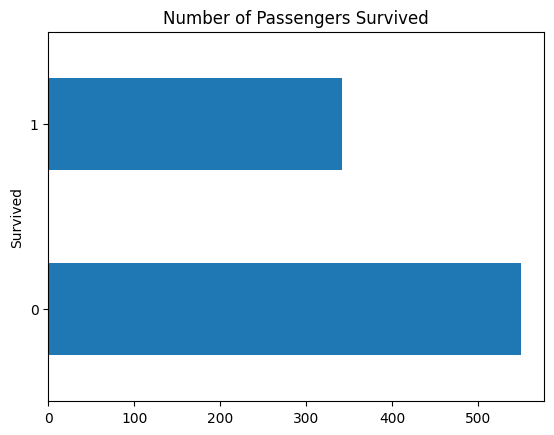

In [196]:
train_data.Survived.value_counts().plot(kind= "barh", title= 'Number of Passengers Survived')
plt.show()

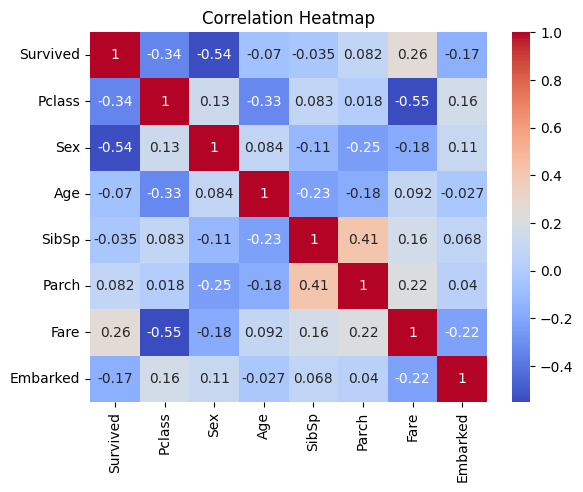

In [197]:
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

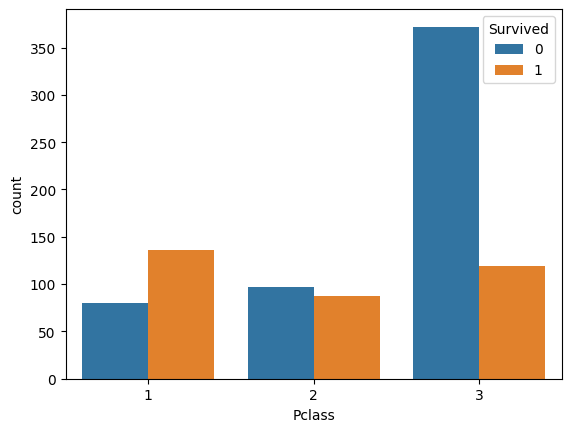

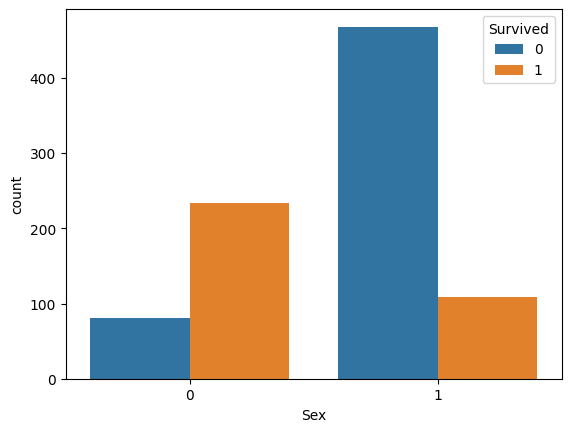

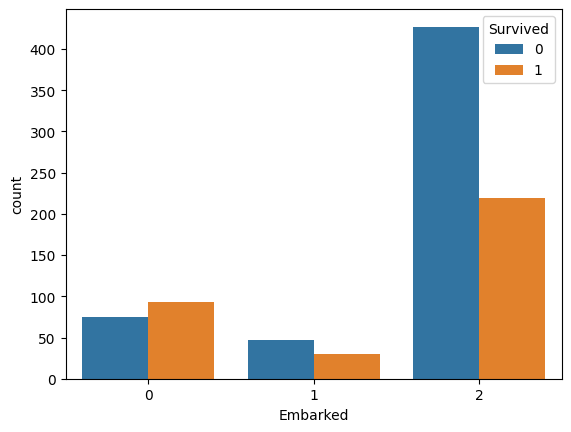

In [198]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.show()

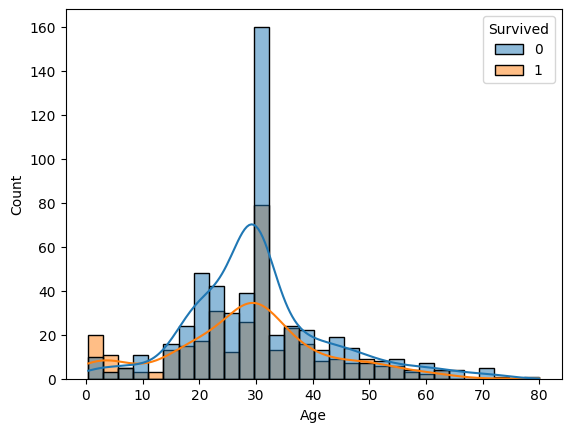

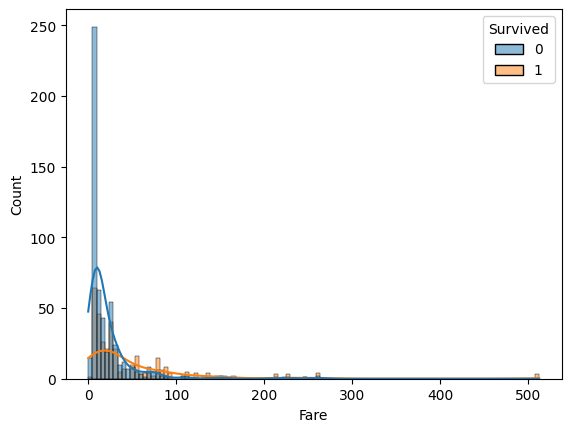

In [199]:
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.show()

sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
plt.show()


# Feature engineering

In [200]:
# New feature FamilySize from SibSp and Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Age Binning 
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
test_data['AgeBin'] = pd.cut(test_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

# Fare Binning
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low','median','Average','high'])
test_data['FareBin'] = pd.cut(test_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low','median','Average','high'])

train_data.drop(columns=['Fare', 'Age','SibSp', 'Parch'], inplace=True)
test_data.drop(columns=['Fare','Age','SibSp', 'Parch'], inplace=True)

In [201]:
train_data.dtypes

Survived         int64
Pclass           int64
Sex              int32
Embarked         int32
FamilySize       int64
AgeBin        category
FareBin       category
dtype: object

In [202]:
# Encode categorical variables after binning
le = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == 'category':
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.fit_transform(test_data[column])
   
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Embarked      int32
FamilySize    int64
AgeBin        int32
FareBin       int32
dtype: object

# Model building 

In [203]:
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier())
]

ensemble = VotingClassifier(estimators=models, voting='hard')

# Model evaluation

In [204]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

scores = cross_validate(ensemble, X_train, y_train, cv=5, scoring=scoring)

for metric, values in scores.items():
    print(f'Cross-validation {metric}: {values.mean():.2f}')

Cross-validation fit_time: 0.17
Cross-validation score_time: 0.02
Cross-validation test_accuracy: 0.81
Cross-validation test_precision: 0.82
Cross-validation test_recall: 0.66
Cross-validation test_f1: 0.73
Cross-validation test_roc_auc: 0.78


Accuracy: 0.8686868686868687


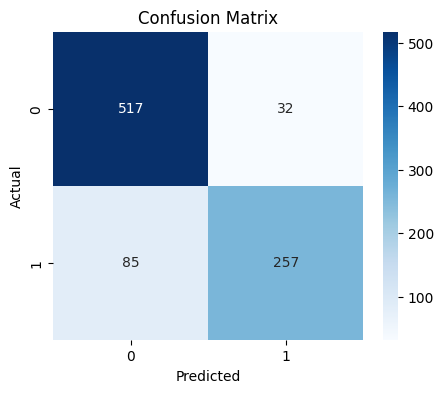

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.75      0.81       342

    accuracy                           0.87       891
   macro avg       0.87      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891

ROC AUC: 0.8465870961556898


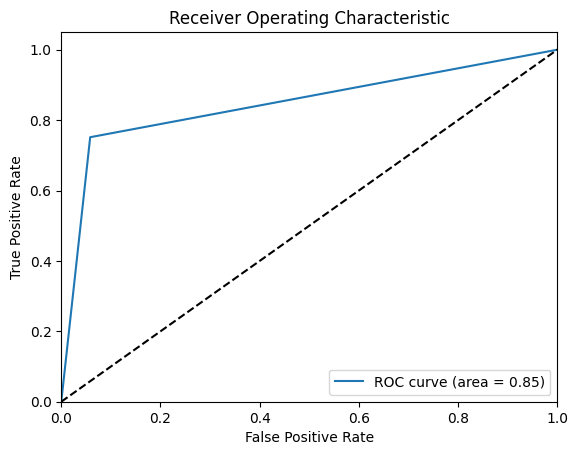

In [205]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)    

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

clf_report = classification_report(y_train, y_pred)

print("Classification Report:\n", clf_report)

fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Save the predictions to a CSV file

In [206]:
X_test = test_data.drop(columns=['PassengerId'])
y_test_pred = ensemble.predict(X_test)

submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
